In [1]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import pandas as pd

df = pd.read_csv('../base_dados/beber_normalizado.csv', low_memory=False)

SVM Padrão:
              precision    recall  f1-score   support

           0       0.70      0.64      0.67     14811
           1       0.67      0.72      0.70     14925

    accuracy                           0.68     29736
   macro avg       0.68      0.68      0.68     29736
weighted avg       0.68      0.68      0.68     29736

Matriz de Confusão (SVM Padrão):
 [[ 9522  5289]
 [ 4157 10768]]


SVM com Kernel RBF:
              precision    recall  f1-score   support

           0       0.70      0.64      0.67     14811
           1       0.67      0.72      0.70     14925

    accuracy                           0.68     29736
   macro avg       0.68      0.68      0.68     29736
weighted avg       0.68      0.68      0.68     29736

Matriz de Confusão (SVM com Kernel RBF):
 [[ 9522  5289]
 [ 4157 10768]]
Resultados de Acurácia salvos com sucesso.


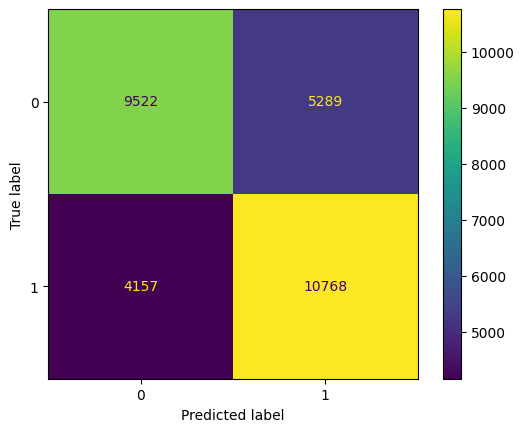

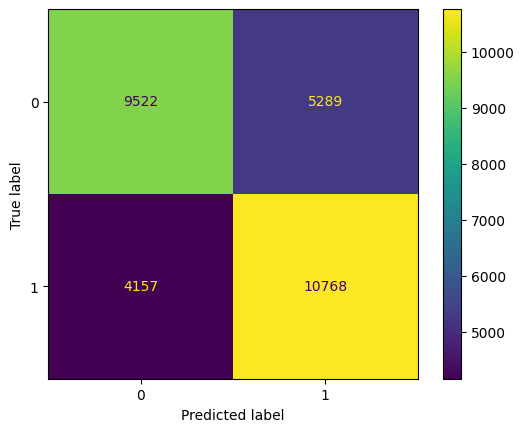

In [ ]:
# Remover 70% da base de dados atual
# df = df.drop(df.sample(frac=0.7, random_state=42).index)

# Separar features e target
X = df.drop('drk_yn', axis=1)
y = df['drk_yn']

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# SVM padrão
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
print("SVM Padrão:")
print(classification_report(y_test, y_pred))

# Matriz de Confusão - SVM Padrão
cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão (SVM Padrão):\n", cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

accuracy = accuracy_score(y_test, y_pred)

# Criar DataFrame com resultados de acurácia
resultados = pd.DataFrame({
    'Modelo': ['SVM Padrão'],
    'Acurácia': [accuracy]
})

# Salvar no CSV
resultados.to_csv('../base_dados/resultados_mineracao_dados/resultado_svm_normalizado.csv', index=False)

print("Resultados de Acurácia salvos com sucesso.")